In [42]:
import pandas as pd
import numpy as np

from utils.net_sma_trend import get_net_trend

In [43]:
from api.constants_test_1 import ACCOUNT_ID, API_KEY, OANDA_URL
from api.OandaApi import OandaApi
from utils.heiken_ashi import ohlc_to_heiken_ashi
import matplotlib.pyplot as plt


In [44]:
api = OandaApi(ACCOUNT_ID, API_KEY, OANDA_URL)

In [45]:
candles = api.get_candles_df("USD_JPY", count=1000, granularity="M15")
candles = candles[["time", "mid_c", "mid_o", "mid_h", "mid_l"]].copy()
# candles = candles.iloc[0:83].copy()
heiken_ashi = ohlc_to_heiken_ashi(candles)

heiken_ashi.tail(30)


,time,ha_open,ha_high,ha_low,ha_close,ha_green,ha_streak,ha_open_at_extreme
970,2025-06-06 05:00:00+00:00,143.826479,143.900000,143.815000,143.85825,1,5,0
971,2025-06-06 05:15:00+00:00,143.842365,143.965000,143.842365,143.90850,1,6,1
972,2025-06-06 05:30:00+00:00,143.875432,143.982000,143.875432,143.94100,1,7,1
973,2025-06-06 05:45:00+00:00,143.908216,143.958000,143.863000,143.91150,1,8,0
974,2025-06-06 06:00:00+00:00,143.909858,143.976000,143.812000,143.90550,0,-1,0
975,2025-06-06 06:15:00+00:00,143.907679,144.066000,143.907679,143.99100,1,1,1
976,2025-06-06 06:30:00+00:00,143.949340,144.136000,143.949340,144.05875,1,2,1
977,2025-06-06 06:45:00+00:00,144.004045,144.095000,143.994000,144.05100,1,3,0
978,2025-06-06 07:00:00+00:00,144.027522,144.139000,143.956000,144.02800,1,4,0
979,2025-06-06 07:15:00+00:00,144.027761,144.027761,143.888000,143.96100,0,-1,1


In [46]:
candles["sma_200"] = candles["mid_c"].rolling(window=200).mean()
candles["sma_100"] = candles["mid_c"].rolling(window=100).mean()
candles["sma_50"] = candles["mid_c"].rolling(window=50).mean()
candles["sma_30"] = candles["mid_c"].rolling(window=30).mean()
candles["sma_10"] = candles["mid_c"].rolling(window=10).mean()



candles["net_trend_200"] = get_net_trend(candles["mid_c"], 200)
candles["net_trend_100"] = get_net_trend(candles["mid_c"], 100)
candles["net_trend_50"] = get_net_trend(candles["mid_c"], 50)
candles["net_trend_30"] = get_net_trend(candles["mid_c"], 30)
candles.dropna(inplace=True)


In [47]:
candles

,time,mid_c,mid_o,mid_h,mid_l,sma_200,sma_100,sma_50,sma_30,sma_10,net_trend_200,net_trend_100,net_trend_50,net_trend_30
199,2025-05-27 04:15:00+00:00,142.495,142.422,142.524,142.400,142.801875,142.70284,142.60316,142.489700,142.3761,-1.0,-1.0,-1.0,-1.0
200,2025-05-27 04:30:00+00:00,142.724,142.494,142.747,142.494,142.797420,142.70486,142.60072,142.485233,142.4253,-1.0,1.0,-1.0,-1.0
201,2025-05-27 04:45:00+00:00,142.856,142.723,142.864,142.699,142.793950,142.70886,142.60262,142.487433,142.4841,-1.0,1.0,1.0,-1.0
202,2025-05-27 05:00:00+00:00,143.130,142.857,143.250,142.857,142.792300,142.71502,142.61014,142.499667,142.5654,-1.0,1.0,1.0,1.0
203,2025-05-27 05:15:00+00:00,143.294,143.130,143.340,143.071,142.791320,142.72193,142.62146,142.517533,142.6559,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-06-06 11:15:00+00:00,144.159,144.132,144.189,144.118,143.402015,143.67993,143.87578,143.992367,144.1062,1.0,1.0,1.0,1.0
996,2025-06-06 11:30:00+00:00,144.142,144.160,144.187,144.076,143.402485,143.69067,143.88806,144.002167,144.1068,1.0,1.0,1.0,1.0
997,2025-06-06 11:45:00+00:00,144.156,144.142,144.186,144.124,143.402785,143.70089,143.90106,144.013500,144.1105,1.0,1.0,1.0,1.0
998,2025-06-06 12:00:00+00:00,144.307,144.158,144.336,144.138,143.403230,143.71302,143.91654,144.028767,144.1396,1.0,1.0,1.0,1.0


In [48]:
from utils.net_strength import get_net_strength_for_row

for index, row in candles.iterrows():
    sma_200 = row['sma_200']
    sma_100 = row['sma_100']
    sma_50 = row['sma_50']
    sma_30 = row['sma_30']
    sma_10 = row['sma_10']
    net_trend_200 = row['net_trend_200']
    net_trend_100 = row['net_trend_100']
    net_trend_50 = row['net_trend_50']
    net_trend_30 = row['net_trend_30']
    current_price = row['mid_c']

    bearish_strength, bullish_strength = get_net_strength_for_row(current_price, net_trend_100, net_trend_200, net_trend_30, net_trend_50, sma_10, sma_100, sma_200, sma_30, sma_50)
    print(f"Processing candle at {row['time']}: bearish_strength = {bearish_strength}, bullish_strength = {bullish_strength}")


Processing candle at 2025-05-27 04:15:00+00:00: bearish_strength = 1.375, bullish_strength = 0.1
Processing candle at 2025-05-27 04:30:00+00:00: bearish_strength = 0.925, bullish_strength = 0.42500000000000004
Processing candle at 2025-05-27 04:45:00+00:00: bearish_strength = 0.6, bullish_strength = 0.6749999999999999
Processing candle at 2025-05-27 05:00:00+00:00: bearish_strength = 0.5, bullish_strength = 0.8749999999999999
Processing candle at 2025-05-27 05:15:00+00:00: bearish_strength = 0.5, bullish_strength = 0.8749999999999999
Processing candle at 2025-05-27 05:30:00+00:00: bearish_strength = 0.4, bullish_strength = 0.975
Processing candle at 2025-05-27 05:45:00+00:00: bearish_strength = 0.2, bullish_strength = 1.175
Processing candle at 2025-05-27 06:00:00+00:00: bearish_strength = 0.2, bullish_strength = 1.175
Processing candle at 2025-05-27 06:15:00+00:00: bearish_strength = 0.2, bullish_strength = 1.175
Processing candle at 2025-05-27 06:30:00+00:00: bearish_strength = 0.2, 

In [49]:
def _compute_strength(row):
    """Return a Series with bearish & bullish strength for a single row."""
    return pd.Series(
        get_net_strength_for_row(
            row['mid_c'],
            row['net_trend_100'],
            row['net_trend_200'],
            row['net_trend_30'],
            row['net_trend_50'],
            row['sma_10'],
            row['sma_100'],
            row['sma_200'],
            row['sma_30'],
            row['sma_50']
        ),
        index=['bearish_strength', 'bullish_strength']
    )

# Add the two new columns to candles
candles[['bearish_strength', 'bullish_strength']] = candles.apply(_compute_strength, axis=1)

# (Optional) inspect the result
candles['bearish_strength_s'] = candles['bearish_strength'].ewm(span=10, adjust=False).mean()
candles['bullish_strength_s'] = candles['bullish_strength'].ewm(span=10, adjust=False).mean()
candles["net_strength"] = candles['bullish_strength'] - candles['bearish_strength']
candles['net_strength_s'] = candles['net_strength'].ewm(span=10, adjust=False).mean()
candles


,time,mid_c,mid_o,mid_h,mid_l,sma_200,sma_100,sma_50,sma_30,sma_10,net_trend_200,net_trend_100,net_trend_50,net_trend_30,bearish_strength,bullish_strength,bearish_strength_s,bullish_strength_s,net_strength,net_strength_s
199,2025-05-27 04:15:00+00:00,142.495,142.422,142.524,142.400,142.801875,142.70284,142.60316,142.489700,142.3761,-1.0,-1.0,-1.0,-1.0,1.375,0.100,1.375000,0.100000,-1.275,-1.275000
200,2025-05-27 04:30:00+00:00,142.724,142.494,142.747,142.494,142.797420,142.70486,142.60072,142.485233,142.4253,-1.0,1.0,-1.0,-1.0,0.925,0.425,1.293182,0.159091,-0.500,-1.134091
201,2025-05-27 04:45:00+00:00,142.856,142.723,142.864,142.699,142.793950,142.70886,142.60262,142.487433,142.4841,-1.0,1.0,1.0,-1.0,0.600,0.675,1.167149,0.252893,0.075,-0.914256
202,2025-05-27 05:00:00+00:00,143.130,142.857,143.250,142.857,142.792300,142.71502,142.61014,142.499667,142.5654,-1.0,1.0,1.0,1.0,0.500,0.875,1.045849,0.366003,0.375,-0.679846
203,2025-05-27 05:15:00+00:00,143.294,143.130,143.340,143.071,142.791320,142.72193,142.62146,142.517533,142.6559,-1.0,1.0,1.0,1.0,0.500,0.875,0.946604,0.458548,0.375,-0.488056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-06-06 11:15:00+00:00,144.159,144.132,144.189,144.118,143.402015,143.67993,143.87578,143.992367,144.1062,1.0,1.0,1.0,1.0,0.000,1.575,0.026930,1.521158,1.575,1.494227
996,2025-06-06 11:30:00+00:00,144.142,144.160,144.187,144.076,143.402485,143.69067,143.88806,144.002167,144.1068,1.0,1.0,1.0,1.0,0.000,1.575,0.022034,1.530947,1.575,1.508913
997,2025-06-06 11:45:00+00:00,144.156,144.142,144.186,144.124,143.402785,143.70089,143.90106,144.013500,144.1105,1.0,1.0,1.0,1.0,0.000,1.575,0.018028,1.538957,1.575,1.520929
998,2025-06-06 12:00:00+00:00,144.307,144.158,144.336,144.138,143.403230,143.71302,143.91654,144.028767,144.1396,1.0,1.0,1.0,1.0,0.000,1.575,0.014750,1.545510,1.575,1.530760


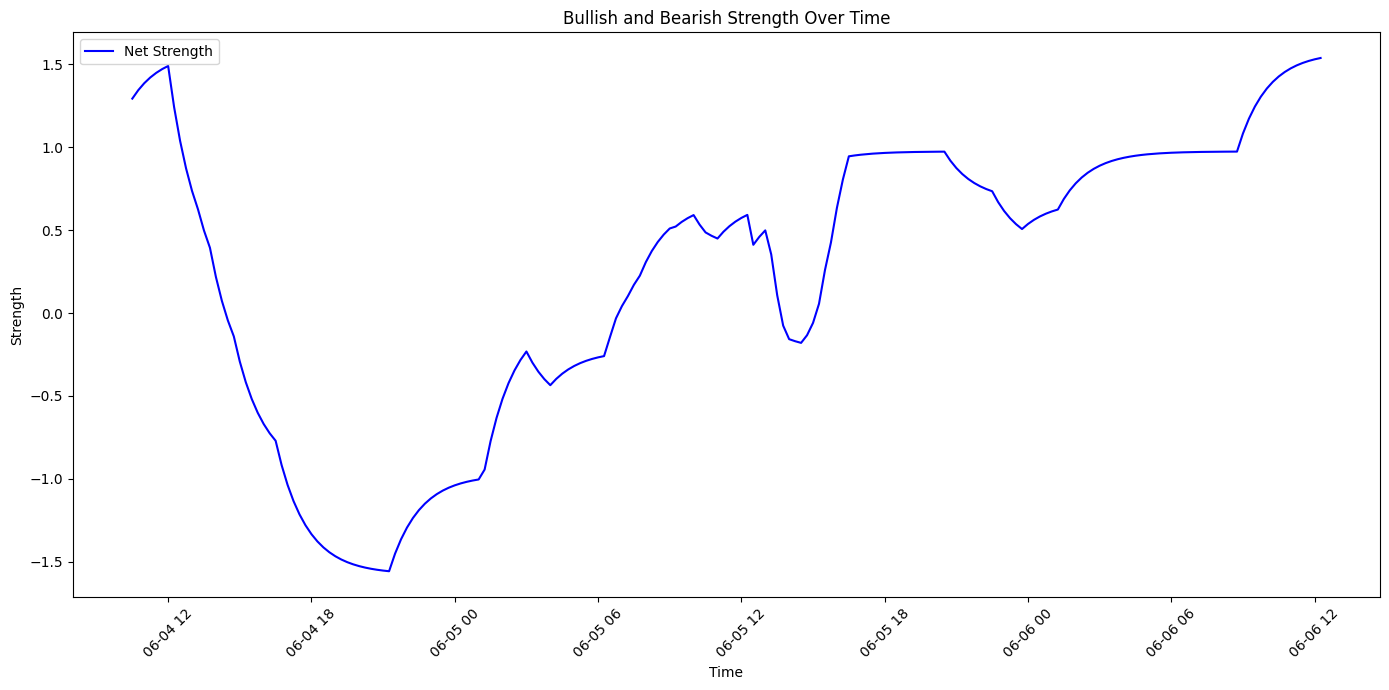

In [52]:
# Plotting the net strength over time
candles = candles.tail(300).copy()

plt.figure(figsize=(14, 7))
plt.plot(candles['time'], candles['net_strength_s'], label='Net Strength', color='blue')
plt.title('Bullish and Bearish Strength Over Time')
plt.xlabel('Time')
plt.ylabel('Strength')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

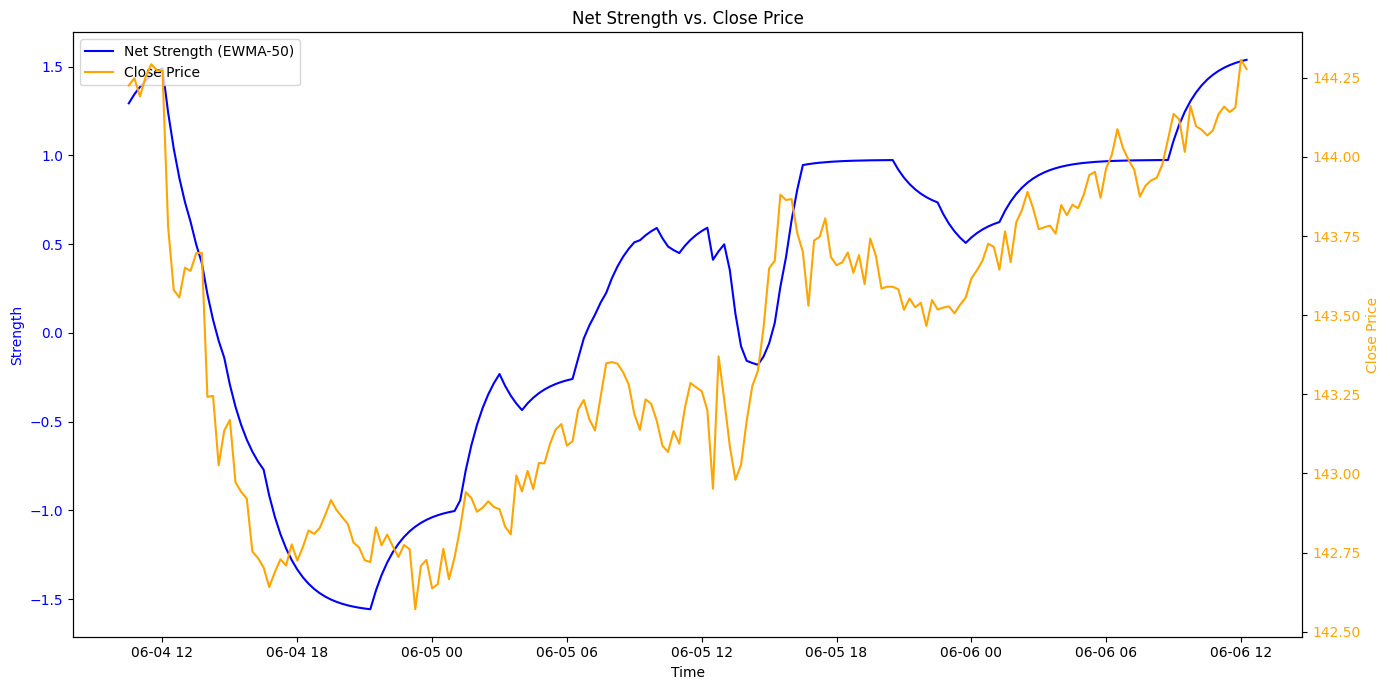

In [53]:

fig, ax1 = plt.subplots(figsize=(14, 7))

# Left axis – net strength
ax1.plot(
    candles['time'],
    candles['net_strength_s'],
    color='blue',
    label='Net Strength (EWMA-50)'
)
ax1.set_xlabel('Time')
ax1.set_ylabel('Strength', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right axis – close price
ax2 = ax1.twinx()
ax2.plot(
    candles['time'],
    candles['mid_c'],
    color='orange',
    label='Close Price'
)
ax2.set_ylabel('Close Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Net Strength vs. Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

